In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
tf.random.set_seed(42)
np.random.seed(42)

In [3]:
%matplotlib inline

# Loading Data

In [4]:
data = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    names=['SL', 'SW', 'PL', 'PW', 'Species']
)
data.head()

,SL,SW,PL,PW,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.Species = data.Species.apply(lambda s: s[5:])
data.head()

,SL,SW,PL,PW,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SL       150 non-null    float64
 1   SW       150 non-null    float64
 2   PL       150 non-null    float64
 3   PW       150 non-null    float64
 4   Species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# EDA

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SW,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PL,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PW,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
data.shape

(150, 5)

In [9]:
data.groupby(by='Species').mean()

,SL,SW,PL,PW
Species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


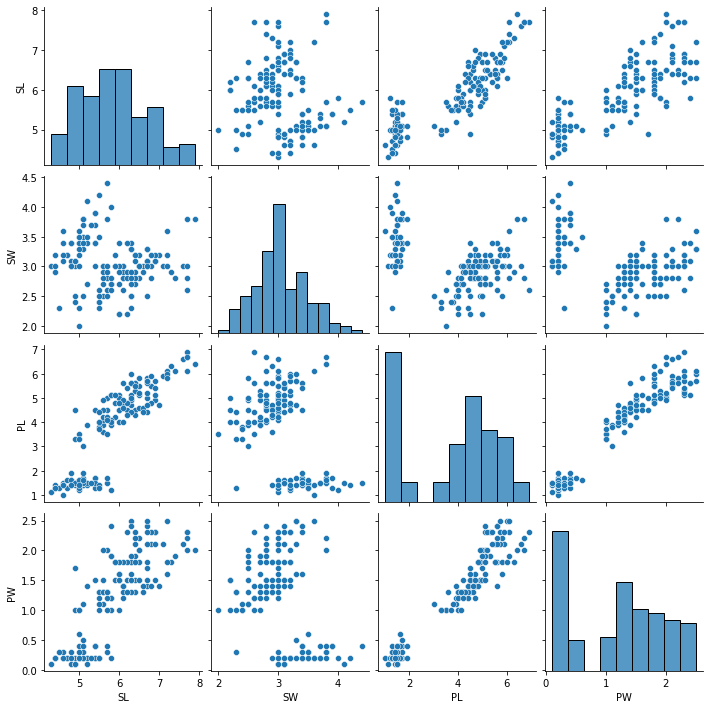

In [ ]:
sns.pairplot(data, palette='Set2')

<Figure size 1440x720 with 0 Axes>

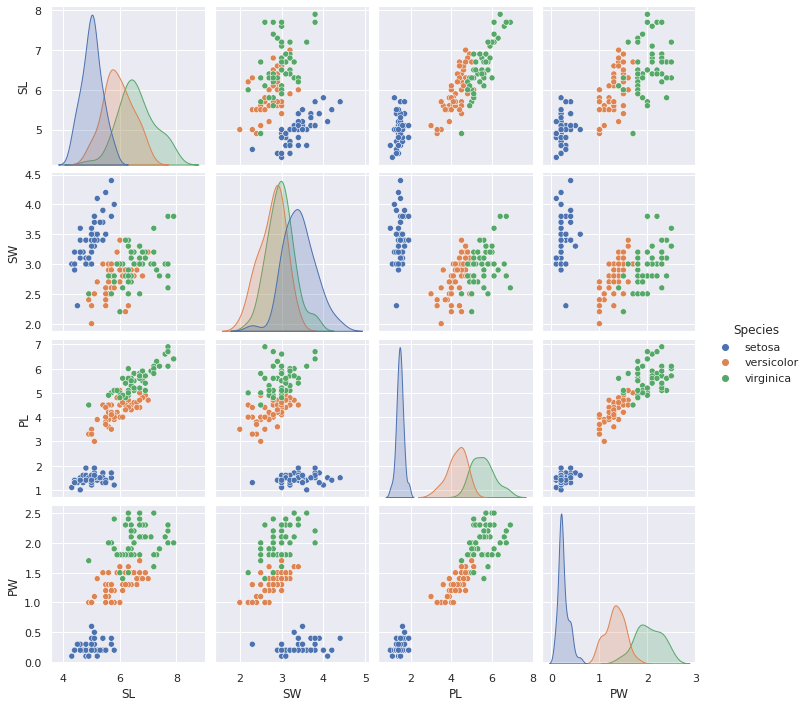

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(20, 10))
sns.pairplot(data, hue='Species')

<AxesSubplot:xlabel='PL'>

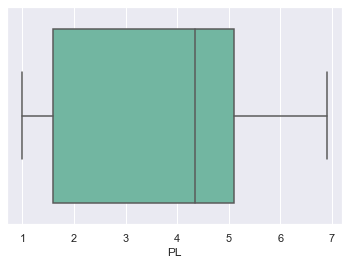

In [ ]:
sns.boxplot(data=data, x='PL', palette='Set2')

<AxesSubplot:xlabel='PW'>

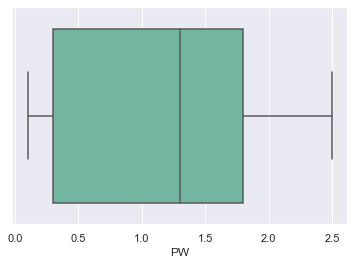

In [ ]:
sns.boxplot(data=data, x='PW', palette='Set2')

# PreProcessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data.Species = encoder.fit_transform(data.Species)


NameError: ignored

In [ ]:
data.head()

,SL,SW,PL,PW,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
encoder.fit_transform(data.Species)

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

# Model Building

In [10]:
data.shape

(150, 5)

In [11]:
feature_normalizer = tf.keras.layers.Normalization(input_shape=[2,], axis=-1)
feature_normalizer.adapt(data[['PL', 'PW']])

In [12]:
classifier = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(units=10, input_dim=2, activation='tanh'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

In [13]:
classifier.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
data

,SL,SW,PL,PW,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
data[['PL', 'PW']].shape,encoder.fit_transform(data.Species).shape


((150, 2), (150, 3))

In [17]:
classifier.fit(
    x=data[['PL', 'PW']].values,
    y=encoder.fit_transform(data.Species),
    validation_split=0.25,
    verbose=2, epochs=10
)

Epoch 1/10
4/4 - 1s - loss: 1.0768 - accuracy: 0.2411 - val_loss: 0.7815 - val_accuracy: 1.0000 - 723ms/epoch - 181ms/step
Epoch 2/10
4/4 - 0s - loss: 1.0504 - accuracy: 0.2321 - val_loss: 0.7782 - val_accuracy: 1.0000 - 26ms/epoch - 6ms/step
Epoch 3/10
4/4 - 0s - loss: 1.0244 - accuracy: 0.2321 - val_loss: 0.7753 - val_accuracy: 1.0000 - 32ms/epoch - 8ms/step
Epoch 4/10
4/4 - 0s - loss: 1.0005 - accuracy: 0.2768 - val_loss: 0.7733 - val_accuracy: 0.9737 - 27ms/epoch - 7ms/step
Epoch 5/10
4/4 - 0s - loss: 0.9761 - accuracy: 0.5000 - val_loss: 0.7721 - val_accuracy: 0.9737 - 26ms/epoch - 7ms/step
Epoch 6/10
4/4 - 0s - loss: 0.9534 - accuracy: 0.6786 - val_loss: 0.7711 - val_accuracy: 0.9737 - 26ms/epoch - 6ms/step
Epoch 7/10
4/4 - 0s - loss: 0.9302 - accuracy: 0.7054 - val_loss: 0.7699 - val_accuracy: 0.9737 - 25ms/epoch - 6ms/step
Epoch 8/10
4/4 - 0s - loss: 0.9090 - accuracy: 0.7143 - val_loss: 0.7696 - val_accuracy: 0.9737 - 39ms/epoch - 10ms/step
Epoch 9/10
4/4 - 0s - loss: 0.8883 -

In [ ]:
classifier.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_13 (Normaliza  (None, 2)                5         
 tion)                                                           
                                                                 
 dense_55 (Dense)            (None, 10)                30        
                                                                 
 dense_56 (Dense)            (None, 3)                 33        
                                                                 
Total params: 68
Trainable params: 63
Non-trainable params: 5
_________________________________________________________________


In [ ]:
history = pd.DataFrame(classifier.history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,1.076812,0.241071,0.781485,1.000000
1,1.050368,0.232143,0.778227,1.000000
2,1.024449,0.232143,0.775342,1.000000
3,1.000459,0.276786,0.773331,0.973684
4,0.976082,0.500000,0.772078,0.973684
5,0.953407,0.678571,0.771138,0.973684
6,0.930190,0.705357,0.769910,0.973684
7,0.909023,0.714286,0.769569,0.973684
8,0.888315,0.750000,0.769452,0.973684
9,0.867483,0.750000,0.768893,0.947368


In [ ]:
def plotNN(model):
    history = pd.DataFrame(model.history.history)
    plt.figure(figsize=(18, 10))
    plt.plot(history.index.values, history['loss'], label='Training Error', color='darkorange', linewidth=3)
    plt.plot(history.index.values, history['val_loss'], label='Validation Error', color='lightgreen', linewidth=3)
    
    plt.legend()
    plt.show()

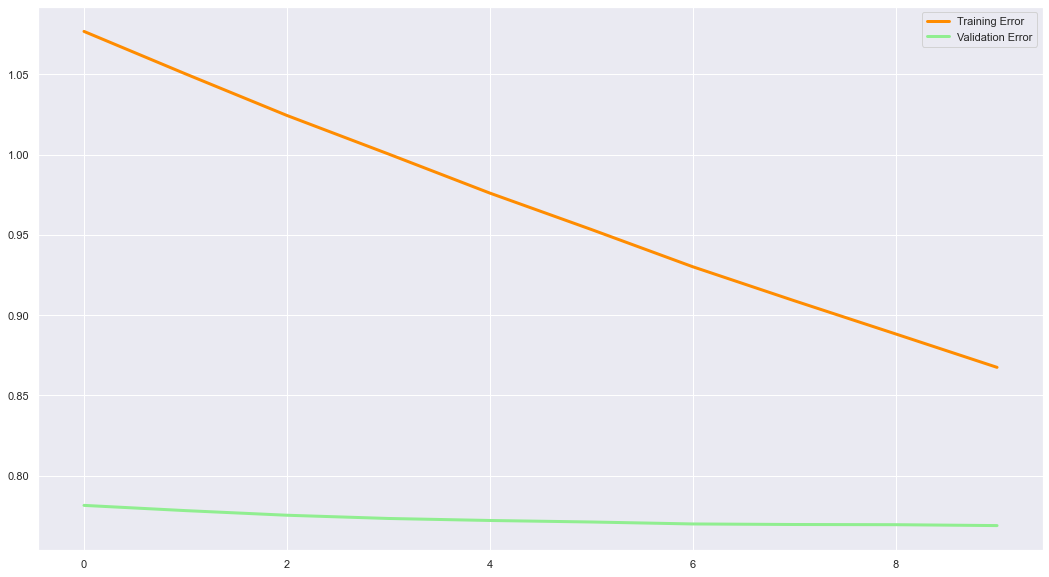

In [ ]:
plotNN(classifier)

# Tasks

In [ ]:
#SW	PL	PW	Species



# Deep NN with 4 Features

In [ ]:
normalizer = tf.keras.layers.Normalization(input_shape=[4,], axis=-1)
normalizer.adapt(data[['SL','SW','PL', 'PW']])

In [ ]:
# Defining The Structure
deepNN = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=28, activation='softmax'),
    tf.keras.layers.Dense(units=1, activation='softmax')
])

In [ ]:
# Defining Optimization
deepNN .compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.MSE,
    metrics=['mse']
)

In [ ]:
deepNN .fit(
    x=data[['SL','SW', 'PL','PW']].values, y=encoder.fit_transform(data.Species),
    epochs=100, verbose=2,
    validation_split=0.2
)

In [ ]:
deepNN.summary()

In [ ]:
plotNN(deepNN)

# Diabetes Prediction

# New section

https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv